#📌 Extracão

In [19]:
import json
import pandas as pd

# Carregar o JSON
with open('TelecomX_Data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Normalizar os dados aninhados
df = pd.json_normalize(data)

#🔧 Transformação

In [20]:
# Renomear colunas substituindo pontos por underscores
df.columns = df.columns.str.replace('.', '_', regex=False)

# Verificar nomes de colunas disponíveis (útil para debug)
print("Colunas disponíveis:")
print(df.columns.tolist())

# Ajustar colunas numéricas com nomes já renomeados
df['Charges_Monthly'] = pd.to_numeric(df.get('account_Charges_Monthly'), errors='coerce')
df['Charges_Total'] = pd.to_numeric(df.get('account_Charges_Total'), errors='coerce')
df['tenure'] = pd.to_numeric(df.get('customer_tenure'), errors='coerce')  # ajuste conforme a origem correta

# Converter colunas categóricas para tipo 'category'
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].astype('category')

# Verificar valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

Colunas disponíveis:
['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges_Monthly', 'account_Charges_Total']

Valores ausentes por coluna:
customerID                    0
Churn                         0
customer_gender               0
customer_SeniorCitizen        0
customer_Partner              0
customer_Dependents           0
customer_tenure               0
phone_PhoneService            0
phone_MultipleLines           0
internet_InternetService      0
internet_OnlineSecurity       0
internet_OnlineBackup         0
internet_DeviceProtection     0
internet_TechSupport          0
internet_Stream

#📊 Carga e análise


Número de clientes: 7267

Colunas disponíveis no DataFrame:
['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges_Monthly', 'account_Charges_Total', 'Charges_Monthly', 'Charges_Total', 'tenure']


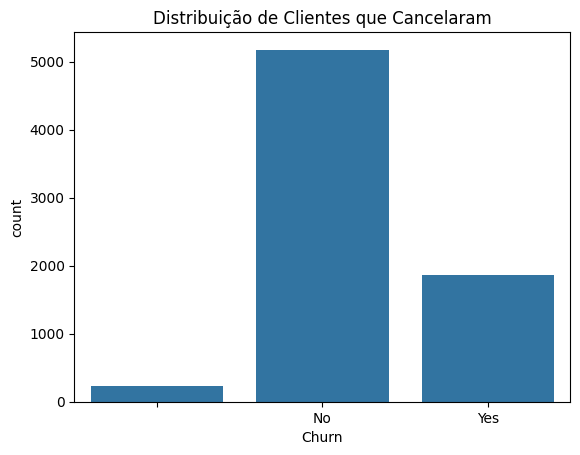

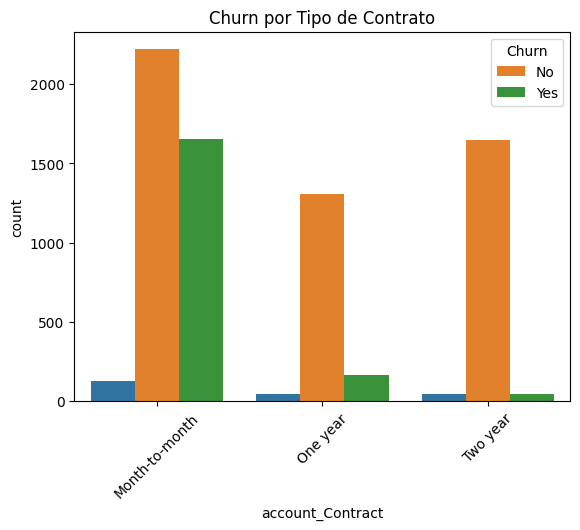

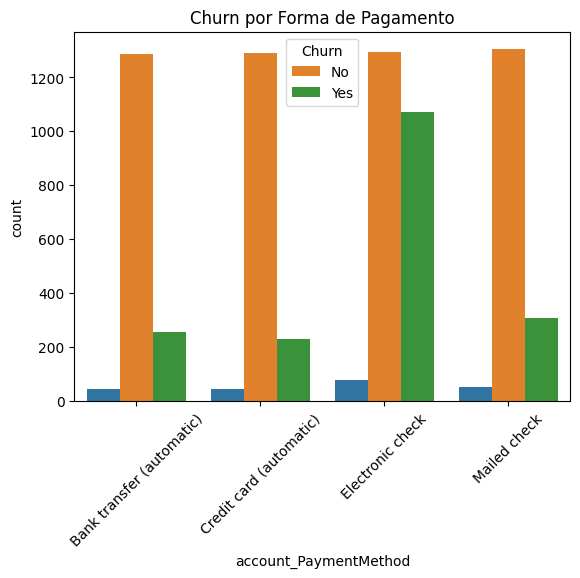

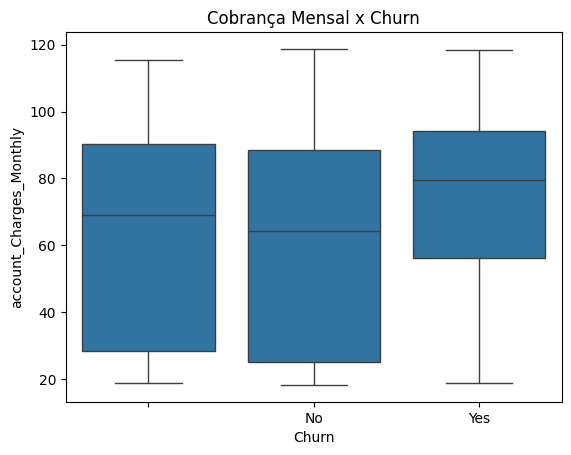

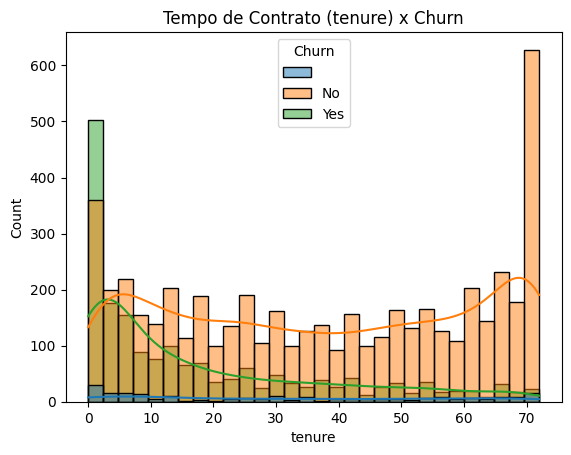

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

print(f"\nNúmero de clientes: {df.shape[0]}")

# Verifique os nomes das colunas para evitar erros
print("\nColunas disponíveis no DataFrame:")
print(df.columns.tolist())

# Gráfico: Distribuição de evasão
sns.countplot(data=df, x='Churn')
plt.title('Distribuição de Clientes que Cancelaram')
plt.show()

# Gráfico: Evasão por tipo de contrato
sns.countplot(data=df, x='account_Contract', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.xticks(rotation=45)
plt.show()

# Gráfico: Evasão por forma de pagamento
sns.countplot(data=df, x='account_PaymentMethod', hue='Churn')
plt.title('Churn por Forma de Pagamento')
plt.xticks(rotation=45)
plt.show()

# Gráfico: Análise de cobrança mensal
sns.boxplot(data=df, x='Churn', y='account_Charges_Monthly')
plt.title('Cobrança Mensal x Churn')
plt.show()

# Gráfico: Correlação com tenure
if 'tenure' in df.columns:
    sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)
    plt.title('Tempo de Contrato (tenure) x Churn')
    plt.show()
else:
    print("Coluna 'tenure' não encontrada, gráfico não exibido.")

#📄Relatorio Final

In [22]:
relatorio = """
📊 Telecom X - Relatório de Evasão de Clientes

1. A maioria dos clientes que cancelaram tinha contrato mensal, o que sugere que contratos mais longos podem reduzir o churn.

2. A forma de pagamento 'Electronic check' está associada a um número maior de cancelamentos. Métodos automáticos como débito automático e cartão apresentam menor churn.

3. Clientes que cancelaram geralmente possuem menor tempo de contrato (tenure) e pagam mensalidades mais altas.

4. Serviços como TechSupport e OnlineSecurity aparentam estar ligados a uma retenção maior de clientes.

5. Estratégias de retenção devem focar em:
   - Incentivar contratos anuais ou de dois anos.
   - Oferecer descontos para pagamentos automáticos.
   - Oferecer pacotes com suporte técnico e segurança online.

Esses insights ajudam a direcionar ações para reduzir a evasão e aumentar a fidelidade dos clientes.
"""
print(relatorio)



📊 Telecom X - Relatório de Evasão de Clientes

1. A maioria dos clientes que cancelaram tinha contrato mensal, o que sugere que contratos mais longos podem reduzir o churn.

2. A forma de pagamento 'Electronic check' está associada a um número maior de cancelamentos. Métodos automáticos como débito automático e cartão apresentam menor churn.

3. Clientes que cancelaram geralmente possuem menor tempo de contrato (tenure) e pagam mensalidades mais altas.

4. Serviços como TechSupport e OnlineSecurity aparentam estar ligados a uma retenção maior de clientes.

5. Estratégias de retenção devem focar em:
   - Incentivar contratos anuais ou de dois anos.
   - Oferecer descontos para pagamentos automáticos.
   - Oferecer pacotes com suporte técnico e segurança online.

Esses insights ajudam a direcionar ações para reduzir a evasão e aumentar a fidelidade dos clientes.

